In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [5]:
def warm_up():
    A = torch.full((13,13),1)     
    A[1,:].fill_(2)     
    A[6,:].fill_(2)     
    A[11,:].fill_(2)     
    A[:,1].fill_(2)     
    A[:,6].fill_(2)     
    A[:,11].fill_(2)     
    A[3:5,3:5].fill_(3)     
    A[3:5,8:10].fill_(3)     
    A[8:10,3:5].fill_(3)     
    A[8:10,8:10].fill_(3)     
    return A
print(warm_up())

tensor([[1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.]])


# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [20]:
def mul_row_loop(input_tensor):
    l = input_tensor.size()
    for i in range(l[0]):
        for j in range(l[1]):
            input_tensor[i,j].fill_((i+1)*input_tensor[i][j]) 
    return input_tensor

        
    

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [19]:
def mul_row_fast(input_tensor):
    size = input_tensor.size()
    b = torch.arange(size[0])
    b = b + 1
    b = b.float()
    res = torch.mul(input_tensor.t(),b).t()
    return res


# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [9]:
from time import perf_counter
def times(input_tensor):
    one_start = perf_counter()
    mul_row_loop(input_tensor)
    one_stop = perf_counter()
    two_start = perf_counter()
    mul_row_fast(input_tensor)
    two_stop = perf_counter()
    one = one_stop - one_start
    two = two_stop - two_start
    return one, two

input_tensor = torch.ones(1000,400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

8.373833571007708, 0.0003190200077369809


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

In [23]:
# Input data
X = torch.randn(100,2)

In [11]:

#in_size = 2
#h_size = 5
#out_size = 2
# class Net1(nn.Module):
#     def __init__(self, in_s, h_s, out_s):
#         super().__init__()
#         self.m1 = nn.Linear(in_s, h_s)
#         self.m2 = nn.Linear(h_s, out_s)
        
#     def forward(self, x):
#         x = torch.relu(self.m1(x.view(-1)))
#         x = self.m2(x)
#         return x

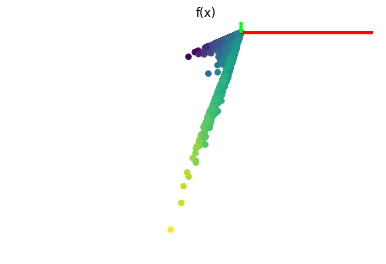

In [14]:
# create 1-layer neural networks with ReLU activation
# linear_fc_relu = TODO 
# Visualize: TODO
linear_fc_relu = nn.Sequential(
        nn.Linear(2, 5, bias=False),
        nn.ReLU(),
        nn.Linear(5, 2, bias=False)
)

Y = linear_fc_relu(X).data
show_scatterplot(Y, colors, title=f'f(x)')
plot_bases(OI, width=0.01)
#linear_fc_relu = Net1(in_size, h_size, out_size)  
#out = linear_fc_relu(X[1])
#print(out)

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

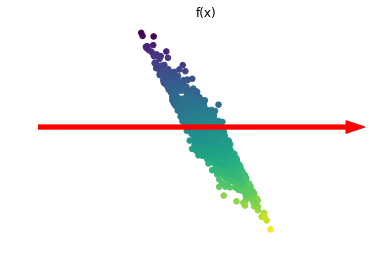

In [18]:
# create 1-layer neural networks with Sigmoid activation
# linear_fc_sigmoid = TODO 
# Visualize: TODO
linear_fc_sigmoid = nn.Sequential(
        nn.Linear(2, 5, bias=False),
        nn.Sigmoid(),
        nn.Linear(5, 2, bias=False)
)

Y = linear_fc_sigmoid(X).data
show_scatterplot(Y, colors, title=f'f(x)')
plot_bases(OI, width=0.01)
  